In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [3]:
len(df)

6991

In [5]:
# Set features. This will also be used as your x values.
X = df[['koi_period', 'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_duration', 'koi_impact', 'koi_depth', 'koi_prad']]
y = df['koi_disposition']
X.head()

,koi_period,koi_teq,koi_insol,koi_model_snr,koi_duration,koi_impact,koi_depth,koi_prad
0,54.418383,443,9.11,25.8,4.50700,0.586,874.8,2.83
1,19.899140,638,39.30,76.3,1.78220,0.969,10829.0,14.60
2,1.736952,1395,891.96,505.6,2.40641,1.276,8079.2,33.46
3,2.525592,1406,926.16,40.9,1.65450,0.701,603.3,2.75
4,4.134435,1160,427.65,40.2,3.14020,0.762,686.0,2.77


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder_train = LabelEncoder().fit(y_train)
label_encoder_test = LabelEncoder().fit(y_test)
encoded_y_train = label_encoder_train.transform(y_train)
encoded_y_test = label_encoder_test.transform(y_test)

In [9]:
from tensorflow.keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)
y_test_categorical

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [10]:
from tensorflow.keras.models import Sequential

# Define the model
model = Sequential()

In [11]:
from tensorflow.keras.layers import Dense

model.add(Dense(100, activation='relu', input_dim=X_train_scaled.shape[1]))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
model.add(Dense(100, activation='relu'))

In [15]:
model.add(Dense(y_train_categorical.shape[1], activation="softmax"))

In [16]:
# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               900       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 11,303
Trainable params: 11,303
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Use categorical crossentropy for categorical data and mean squared error for regression
model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=['accuracy'])

In [18]:
# Fit (train) the model
model.fit(X_train_scaled, y_train_categorical, epochs=1000, shuffle=True, verbose=2)

Epoch 1/1000
5243/5243 - 0s - loss: 0.9566 - acc: 0.5031
Epoch 2/1000
5243/5243 - 0s - loss: 0.8585 - acc: 0.5930
Epoch 3/1000
5243/5243 - 0s - loss: 0.8309 - acc: 0.6092
Epoch 4/1000
5243/5243 - 0s - loss: 0.8136 - acc: 0.6147
Epoch 5/1000
5243/5243 - 0s - loss: 0.7993 - acc: 0.6277
Epoch 6/1000
5243/5243 - 0s - loss: 0.7899 - acc: 0.6283
Epoch 7/1000
5243/5243 - 0s - loss: 0.7826 - acc: 0.6304
Epoch 8/1000
5243/5243 - 0s - loss: 0.7763 - acc: 0.6407
Epoch 9/1000
5243/5243 - 0s - loss: 0.7672 - acc: 0.6445
Epoch 10/1000
5243/5243 - 0s - loss: 0.7629 - acc: 0.6487
Epoch 11/1000
5243/5243 - 0s - loss: 0.7617 - acc: 0.6500
Epoch 12/1000
5243/5243 - 0s - loss: 0.7549 - acc: 0.6544
Epoch 13/1000
5243/5243 - 0s - loss: 0.7499 - acc: 0.6565
Epoch 14/1000
5243/5243 - 0s - loss: 0.7465 - acc: 0.6504
Epoch 15/1000
5243/5243 - 0s - loss: 0.7408 - acc: 0.6557
Epoch 16/1000
5243/5243 - 0s - loss: 0.7422 - acc: 0.6555
Epoch 17/1000
5243/5243 - 0s - loss: 0.7333 - acc: 0.6658
Epoch 18/1000
5243/5243

Epoch 142/1000
5243/5243 - 0s - loss: 0.5760 - acc: 0.7580
Epoch 143/1000
5243/5243 - 0s - loss: 0.5721 - acc: 0.7566
Epoch 144/1000
5243/5243 - 0s - loss: 0.5684 - acc: 0.7599
Epoch 145/1000
5243/5243 - 0s - loss: 0.5706 - acc: 0.7606
Epoch 146/1000
5243/5243 - 0s - loss: 0.5679 - acc: 0.7633
Epoch 147/1000
5243/5243 - 0s - loss: 0.5734 - acc: 0.7580
Epoch 148/1000
5243/5243 - 0s - loss: 0.5690 - acc: 0.7608
Epoch 149/1000
5243/5243 - 0s - loss: 0.5677 - acc: 0.7604
Epoch 150/1000
5243/5243 - 0s - loss: 0.5657 - acc: 0.7601
Epoch 151/1000
5243/5243 - 0s - loss: 0.5631 - acc: 0.7629
Epoch 152/1000
5243/5243 - 0s - loss: 0.5714 - acc: 0.7593
Epoch 153/1000
5243/5243 - 0s - loss: 0.5632 - acc: 0.7639
Epoch 154/1000
5243/5243 - 0s - loss: 0.5623 - acc: 0.7641
Epoch 155/1000
5243/5243 - 0s - loss: 0.5664 - acc: 0.7608
Epoch 156/1000
5243/5243 - 0s - loss: 0.5641 - acc: 0.7660
Epoch 157/1000
5243/5243 - 0s - loss: 0.5624 - acc: 0.7629
Epoch 158/1000
5243/5243 - 0s - loss: 0.5646 - acc: 0.76

Epoch 281/1000
5243/5243 - 0s - loss: 0.5358 - acc: 0.7734
Epoch 282/1000
5243/5243 - 0s - loss: 0.5390 - acc: 0.7780
Epoch 283/1000
5243/5243 - 0s - loss: 0.5369 - acc: 0.7725
Epoch 284/1000
5243/5243 - 0s - loss: 0.5395 - acc: 0.7738
Epoch 285/1000
5243/5243 - 0s - loss: 0.5390 - acc: 0.7755
Epoch 286/1000
5243/5243 - 0s - loss: 0.5379 - acc: 0.7734
Epoch 287/1000
5243/5243 - 0s - loss: 0.5417 - acc: 0.7707
Epoch 288/1000
5243/5243 - 0s - loss: 0.5418 - acc: 0.7734
Epoch 289/1000
5243/5243 - 0s - loss: 0.5411 - acc: 0.7723
Epoch 290/1000
5243/5243 - 0s - loss: 0.5367 - acc: 0.7770
Epoch 291/1000
5243/5243 - 0s - loss: 0.5339 - acc: 0.7820
Epoch 292/1000
5243/5243 - 0s - loss: 0.5400 - acc: 0.7734
Epoch 293/1000
5243/5243 - 0s - loss: 0.5340 - acc: 0.7793
Epoch 294/1000
5243/5243 - 0s - loss: 0.5405 - acc: 0.7717
Epoch 295/1000
5243/5243 - 0s - loss: 0.5371 - acc: 0.7725
Epoch 296/1000
5243/5243 - 0s - loss: 0.5321 - acc: 0.7770
Epoch 297/1000
5243/5243 - 0s - loss: 0.5363 - acc: 0.77

Epoch 420/1000
5243/5243 - 0s - loss: 0.5193 - acc: 0.7776
Epoch 421/1000
5243/5243 - 0s - loss: 0.5166 - acc: 0.7765
Epoch 422/1000
5243/5243 - 0s - loss: 0.5122 - acc: 0.7801
Epoch 423/1000
5243/5243 - 0s - loss: 0.5162 - acc: 0.7850
Epoch 424/1000
5243/5243 - 0s - loss: 0.5167 - acc: 0.7818
Epoch 425/1000
5243/5243 - 0s - loss: 0.5150 - acc: 0.7856
Epoch 426/1000
5243/5243 - 0s - loss: 0.5170 - acc: 0.7814
Epoch 427/1000
5243/5243 - 0s - loss: 0.5105 - acc: 0.7828
Epoch 428/1000
5243/5243 - 0s - loss: 0.5120 - acc: 0.7870
Epoch 429/1000
5243/5243 - 0s - loss: 0.5164 - acc: 0.7833
Epoch 430/1000
5243/5243 - 0s - loss: 0.5115 - acc: 0.7826
Epoch 431/1000
5243/5243 - 0s - loss: 0.5123 - acc: 0.7805
Epoch 432/1000
5243/5243 - 0s - loss: 0.5112 - acc: 0.7831
Epoch 433/1000
5243/5243 - 0s - loss: 0.5116 - acc: 0.7831
Epoch 434/1000
5243/5243 - 0s - loss: 0.5107 - acc: 0.7856
Epoch 435/1000
5243/5243 - 0s - loss: 0.5125 - acc: 0.7818
Epoch 436/1000
5243/5243 - 0s - loss: 0.5120 - acc: 0.78

Epoch 559/1000
5243/5243 - 0s - loss: 0.4996 - acc: 0.7910
Epoch 560/1000
5243/5243 - 0s - loss: 0.5022 - acc: 0.7900
Epoch 561/1000
5243/5243 - 0s - loss: 0.4983 - acc: 0.7910
Epoch 562/1000
5243/5243 - 0s - loss: 0.4965 - acc: 0.7921
Epoch 563/1000
5243/5243 - 0s - loss: 0.4922 - acc: 0.7934
Epoch 564/1000
5243/5243 - 0s - loss: 0.4999 - acc: 0.7931
Epoch 565/1000
5243/5243 - 0s - loss: 0.4963 - acc: 0.7936
Epoch 566/1000
5243/5243 - 0s - loss: 0.4920 - acc: 0.7875
Epoch 567/1000
5243/5243 - 0s - loss: 0.4946 - acc: 0.7894
Epoch 568/1000
5243/5243 - 0s - loss: 0.4962 - acc: 0.7910
Epoch 569/1000
5243/5243 - 0s - loss: 0.4894 - acc: 0.7902
Epoch 570/1000
5243/5243 - 0s - loss: 0.4932 - acc: 0.7927
Epoch 571/1000
5243/5243 - 0s - loss: 0.4878 - acc: 0.7946
Epoch 572/1000
5243/5243 - 0s - loss: 0.4924 - acc: 0.7967
Epoch 573/1000
5243/5243 - 0s - loss: 0.4925 - acc: 0.7934
Epoch 574/1000
5243/5243 - 0s - loss: 0.4920 - acc: 0.7896
Epoch 575/1000
5243/5243 - 0s - loss: 0.4911 - acc: 0.79

Epoch 698/1000
5243/5243 - 0s - loss: 0.4767 - acc: 0.8034
Epoch 699/1000
5243/5243 - 0s - loss: 0.4793 - acc: 0.7957
Epoch 700/1000
5243/5243 - 0s - loss: 0.4736 - acc: 0.7999
Epoch 701/1000
5243/5243 - 0s - loss: 0.4743 - acc: 0.8026
Epoch 702/1000
5243/5243 - 0s - loss: 0.4783 - acc: 0.8001
Epoch 703/1000
5243/5243 - 0s - loss: 0.4763 - acc: 0.8016
Epoch 704/1000
5243/5243 - 0s - loss: 0.4750 - acc: 0.8020
Epoch 705/1000
5243/5243 - 0s - loss: 0.4754 - acc: 0.8018
Epoch 706/1000
5243/5243 - 0s - loss: 0.4783 - acc: 0.7988
Epoch 707/1000
5243/5243 - 0s - loss: 0.4766 - acc: 0.8011
Epoch 708/1000
5243/5243 - 0s - loss: 0.4765 - acc: 0.7988
Epoch 709/1000
5243/5243 - 0s - loss: 0.4732 - acc: 0.8001
Epoch 710/1000
5243/5243 - 0s - loss: 0.4763 - acc: 0.7994
Epoch 711/1000
5243/5243 - 0s - loss: 0.4744 - acc: 0.8074
Epoch 712/1000
5243/5243 - 0s - loss: 0.4762 - acc: 0.8011
Epoch 713/1000
5243/5243 - 0s - loss: 0.4745 - acc: 0.8047
Epoch 714/1000
5243/5243 - 0s - loss: 0.4767 - acc: 0.80

Epoch 837/1000
5243/5243 - 0s - loss: 0.4551 - acc: 0.8119
Epoch 838/1000
5243/5243 - 0s - loss: 0.4593 - acc: 0.8106
Epoch 839/1000
5243/5243 - 0s - loss: 0.4601 - acc: 0.8074
Epoch 840/1000
5243/5243 - 0s - loss: 0.4565 - acc: 0.8076
Epoch 841/1000
5243/5243 - 0s - loss: 0.4567 - acc: 0.8098
Epoch 842/1000
5243/5243 - 0s - loss: 0.4576 - acc: 0.8066
Epoch 843/1000
5243/5243 - 0s - loss: 0.4576 - acc: 0.8116
Epoch 844/1000
5243/5243 - 0s - loss: 0.4604 - acc: 0.8083
Epoch 845/1000
5243/5243 - 0s - loss: 0.4575 - acc: 0.8127
Epoch 846/1000
5243/5243 - 0s - loss: 0.4550 - acc: 0.8135
Epoch 847/1000
5243/5243 - 0s - loss: 0.4601 - acc: 0.8051
Epoch 848/1000
5243/5243 - 0s - loss: 0.4649 - acc: 0.8076
Epoch 849/1000
5243/5243 - 0s - loss: 0.4703 - acc: 0.8083
Epoch 850/1000
5243/5243 - 0s - loss: 0.4568 - acc: 0.8140
Epoch 851/1000
5243/5243 - 0s - loss: 0.4582 - acc: 0.8062
Epoch 852/1000
5243/5243 - 0s - loss: 0.4519 - acc: 0.8098
Epoch 853/1000
5243/5243 - 0s - loss: 0.4557 - acc: 0.80

Epoch 976/1000
5243/5243 - 0s - loss: 0.4433 - acc: 0.8152
Epoch 977/1000
5243/5243 - 0s - loss: 0.4393 - acc: 0.8133
Epoch 978/1000
5243/5243 - 0s - loss: 0.4414 - acc: 0.8194
Epoch 979/1000
5243/5243 - 0s - loss: 0.4418 - acc: 0.8179
Epoch 980/1000
5243/5243 - 0s - loss: 0.4423 - acc: 0.8121
Epoch 981/1000
5243/5243 - 0s - loss: 0.4402 - acc: 0.8205
Epoch 982/1000
5243/5243 - 0s - loss: 0.4351 - acc: 0.8217
Epoch 983/1000
5243/5243 - 0s - loss: 0.4418 - acc: 0.8150
Epoch 984/1000
5243/5243 - 0s - loss: 0.4357 - acc: 0.8180
Epoch 985/1000
5243/5243 - 0s - loss: 0.4355 - acc: 0.8154
Epoch 986/1000
5243/5243 - 0s - loss: 0.4388 - acc: 0.8201
Epoch 987/1000
5243/5243 - 0s - loss: 0.4395 - acc: 0.8158
Epoch 988/1000
5243/5243 - 0s - loss: 0.4415 - acc: 0.8146
Epoch 989/1000
5243/5243 - 0s - loss: 0.4413 - acc: 0.8161
Epoch 990/1000
5243/5243 - 0s - loss: 0.4405 - acc: 0.8179
Epoch 991/1000
5243/5243 - 0s - loss: 0.4403 - acc: 0.8140
Epoch 992/1000
5243/5243 - 0s - loss: 0.4434 - acc: 0.81

In [19]:
model.save("nasa.h5")

In [20]:
from tensorflow.keras.models import load_model
model = load_model("nasa.h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [21]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1748/1748 - 0s - loss: 0.6752 - acc: 0.7449
Loss: 0.6752293456337272, Accuracy: 0.7448512315750122


In [29]:
predictions = model.predict_classes(X_test_scaled)
predictions

array([0, 1, 1, ..., 2, 0, 1], dtype=int64)

In [36]:
dd = pd.DataFrame({"Predictions": predictions, "Actual":y_test})
dd.head()

,Predictions,Actual
4990,0,FALSE POSITIVE
1425,1,CONFIRMED
144,1,CONFIRMED
6589,2,FALSE POSITIVE
4443,2,CANDIDATE


In [37]:
predictions_label = label_encoder_test.inverse_transform(predictions)

In [38]:
gg = pd.DataFrame({"Predictions": predictions_label, "Actual":y_test})
gg.head()

,Predictions,Actual
4990,CANDIDATE,FALSE POSITIVE
1425,CONFIRMED,CONFIRMED
144,CONFIRMED,CONFIRMED
6589,FALSE POSITIVE,FALSE POSITIVE
4443,FALSE POSITIVE,CANDIDATE


In [47]:
# To confirm accuracy
s = gg["Predictions"].count()
wrong = 0
for i in range(0,s):
    a=gg["Predictions"].iloc[i]
    b=gg["Actual"].iloc[i]
    if a != b:
        wrong = wrong + 1
        
(s - wrong) / s

0.7448512585812357

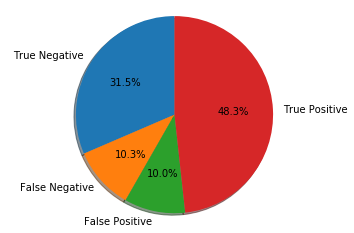

In [44]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf = confusion_matrix(gg['Actual'], gg['Predictions'])

tn = conf[0][0]
fp = conf[0][1]
fn = conf[1][0]
tp = conf[1][1]

labels = 'True Negative', 'False Negative', 'False Positive', 'True Positive'
sizes = [tn,fp,fn,tp]
explode = (0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [48]:
target_names = ["False Positive", "Candidate", "Confirmed"]
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions_label,
                            target_names=target_names))

                precision    recall  f1-score   support

False Positive       0.57      0.56      0.57       420
     Candidate       0.72      0.79      0.75       461
     Confirmed       0.84      0.81      0.83       867

      accuracy                           0.74      1748
     macro avg       0.71      0.72      0.72      1748
  weighted avg       0.75      0.74      0.75      1748

